# Unit 4 - Capstone Project

# Introduction
For this project, I will be using a dataset from Kaggle regarding the top 1000 movies from 2006-2016 according to IMDB (Internet Movie Database). Those top 1000 movies are based on which users voted the most for each movie from 2006-2016. Their variables are genre, year, runtime, revenue (millions), metascore, and audience rating score. IMDB (Internet Movie Database) is a company that provides information about the movie. The significance of this project is to emphasize the data relating to movies. The data set is a great way to recommend moviegoers into a certain movie. For example, if a movie earns a high rating and if its storyline is appealing, that person may go see it.

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

movies = pd.read_csv('moviedata-IMDB.csv')
movies.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,51,Star Wars: Episode VII - The Force Awakens,"Action,Adventure,Fantasy",Three decades after the defeat of the Galactic...,J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",2015,136,8.1,661608,936.63,81.0
1,88,Avatar,"Action,Adventure,Fantasy",A paraplegic marine dispatched to the moon Pan...,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",2009,162,7.8,935408,760.51,83.0
2,86,Jurassic World,"Action,Adventure,Sci-Fi","A new theme park, built on the original site o...",Colin Trevorrow,"Chris Pratt, Bryce Dallas Howard, Ty Simpkins,...",2015,124,7.0,455169,652.18,59.0
3,77,The Avengers,"Action,Sci-Fi",Earth's mightiest heroes must come together an...,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",2012,143,8.1,1045588,623.28,69.0
4,55,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0


# Data Set Discription
Genre – What time of movie is it?

Year – The year the movie was produced (anywhere from 2006-2016)

Runtime – The duration of the movie

Revenue – How much did the movie earn domestically?

Metascore – The average score of professional critics from publications from 0 to 100.

Rating – How the audiences rated the movie on a scale from 0 to 10


Because there is more than one genre in many movies, I’m going to split them up and write a code to only show the first genre.


In [51]:
movies["FirstGenre"] = movies["Genre"]
movies.head()

movies["FirstGenre"]= movies["FirstGenre"].apply(lambda x: x.split(",")[0])
movies.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,FirstGenre
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,Action
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,Adventure
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,Horror
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,Animation
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,Action


# Does Genre correlate with the Box Office and the ratings on average for each film?#

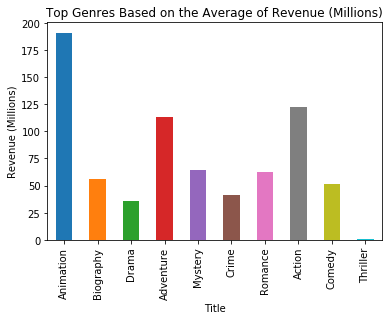

In [52]:
title = movies.groupby('FirstGenre').mean()

title = title.sort_values(by = 'Rating', ascending = False)[0:10]

title['Revenue (Millions)'].plot(kind='bar')

plt.xlabel('Title')
plt.ylabel('Revenue (Millions)')
plt.title('Top Genres Based on the Average of Revenue (Millions)')

plt.show()

# Animation does correlate well with the box office and its average audience rating. Most animation films do well because they are assessible to a quadrant audience unlike the majority of R-rated critically-acclaimed movies. However, adventure and action movies scored lower on IMDB; yet, they scored higher at the box office. The reason is that most of those movies are from familiar franchises that audiences have seen before. With biography and drama movies, they have better quality. However, there are some certain movies that deflate its box office due to the nature of the movie and some of those movies may not be assessible to mainstream audiences. 

# Does the audience ratings correlate well with the 10 Top Grossers?

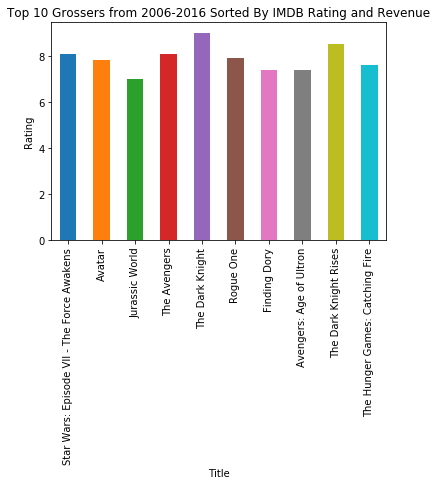

In [49]:
movies = pd.read_csv('moviedata.csv')
movies.head()

title = movies.groupby('Title').mean()

title = title.sort_values(by = 'Revenue (Millions)', ascending = False)[0:10]

title['Rating'].plot(kind='bar')

plt.xlabel('Title')
plt.ylabel('Rating')
plt.title('Top 10 Grossers from 2006-2016 Sorted By IMDB Rating and Revenue')

plt.show()

# The IMDB scores are not all high compared to the top 10 movies among 1000 users. Therefore, only one of them (Avatar) is an original. Out of all the top 10 best movies according to IMDB users, only one of them (The Dark Knight) made it to the top 10 for the box office. Back in the 1990s, there were more originals that were in the top 10 in terms of box office grosses. When sequels are made, if the quality is great from its predecessor, they will pay money to go see it. Now of these days, sequels have a better chance of getting greenlighted by Hollywood than original movies. Jurassic World, Finding Dory, and Avengers: Age of Ultron did not live up to their quality compared to their respective predecessors.

# Does Metacritic correlate with audience ratings?

c:\users\ben\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


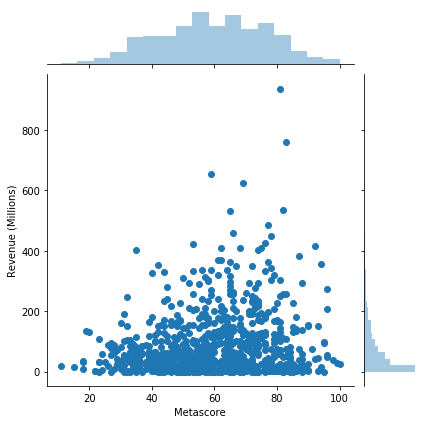

In [48]:
sns.jointplot(x ="Metascore", y ="Revenue (Millions)", data = movies)

# In 2014, Metascore had one of the best scores for a top movie. 2016 had one of the worst movies ever among critics. 2006 had the highest score for a low-quality movie among critics. Despite three critics giving high marks to three of those movies, the IMDB ratings among users averaged a 5/10, which translates that the audiences thought those movies were overrated. There is no definite answer for this even though ratings tend to do correlate with the audience critics. However, there are exceptions such as movies with big stars (Chris Pratt from Passengers, most Adam Sandler and Will Smith movies, Gerald Butler from Law Abiding Citizen) do better with audiences than critics while other highly-reviewed movies (Tree of Life, Love of Friendship, Under the Skin) score significantly higher than audiences.

# Does Metascore correlate with Box Office well?

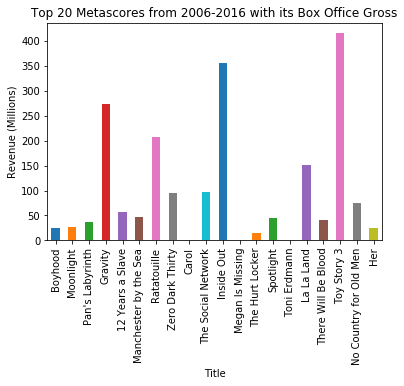

In [54]:
title = movies.groupby('Title').mean()

title = title.sort_values(by = 'Metascore', ascending = False)[0:20]

title['Revenue (Millions)'].plot(kind='bar')

plt.xlabel('Title')
plt.ylabel('Revenue (Millions)')
plt.title('Top 20 Metascores from 2006-2016 with its Box Office Gross')

plt.show()

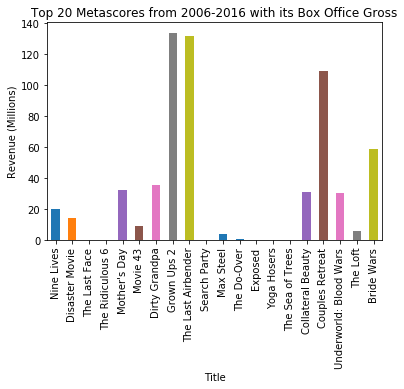

In [46]:
title = movies.groupby('Title').mean()

title = title.sort_values(by = 'Metascore', ascending = True)[0:20]

title['Revenue (Millions)'].plot(kind='bar')

plt.xlabel('Title')
plt.ylabel('Revenue (Millions)')
plt.title('Top 20 Metascores from 2006-2016 with their Box Office Gross')

plt.show()

# There is no definite answer because it depends on the storyline of the movie, if the movie is a sequel, and if the movie comes from the director of a previous popular movie. Some critically-acclaimed movies that audiences enjoyed (Her, Boyhood, Moonlight) may make lower money than movies with mixed to negative reviews that audiences did not care for (Grown Ups 2, Bride Wars, Couples Retreat). The Last Airbender is a notable one that made more revenue that some movies with fantastic reviews and audience ratings because they came from an adaptation (A popular show on Nickeledon) that audiences were familiar with.

# Further Research #
I plan to find more information on those analytical questions that I listed. I hope to forecast models with python related to box office. Also, I hope to add more attributes such as budget, international gross, studio and gross profit for each of the movies. If I am able to find a dataset for them, I will be able to write more questions for them and relate those attributes to this dataset. A further question I hope to accomplish: Does big budget correlate well with high-grossing movies?